# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

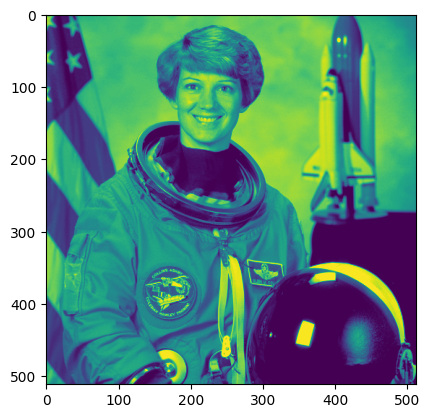

In [2]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [32]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] - n < 0 or p[0] + n >= img.shape[0] or p[1] - n < 0 or p[1] + n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            y = p[0] - n + q[0]
            x = p[1] - n + q[1]
            neighborhood_sum += img[y,x]
        mean = neighborhood_sum / (size * size)
        result[p] = mean
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

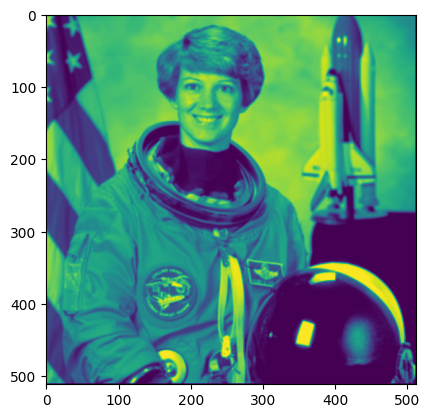

In [33]:
plt.imshow(meanfilter(img, 3))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [34]:
img1 = meanfilter(img, 5)
img2 = plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(img1, img2, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [45]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0] - n < 0 or p[0] + n >= img.shape[0] or p[1] - n < 0 or p[1] + n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        data = list()
        for q in numpy.ndindex(size, size):
            y = p[0] - n + q[0]
            x = p[1] - n + q[1]
            data.append(img[y,x])
        data.sort()
        u = (size * size) // 2
        median = data[u]
        result[p] = median
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

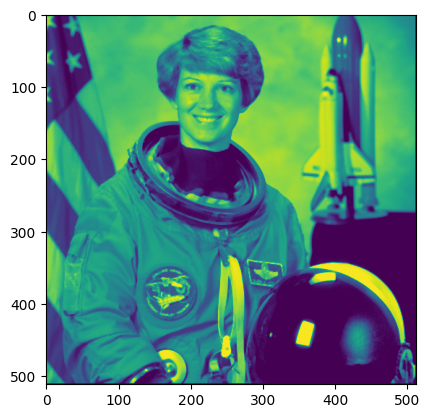

In [46]:
plt.imshow(medianfilter(img, 3))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [49]:
img1 = medianfilter(img, 5)
img2 = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(img1, img2, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [50]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

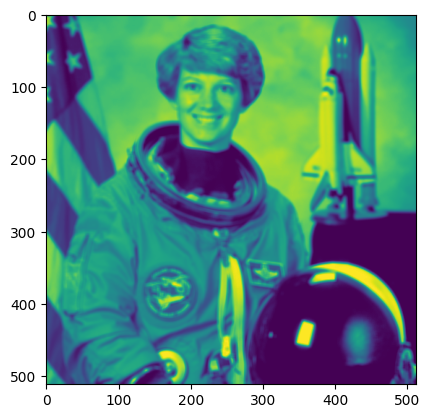

In [52]:
img3 = scipy.ndimage.uniform_filter(img, 5)
plt.imshow(img3)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

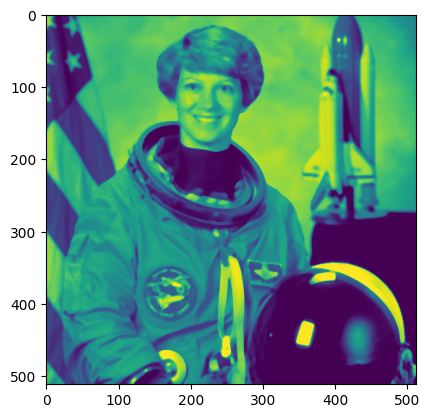

In [53]:
img4 = scipy.ndimage.median_filter(img, 5)
plt.imshow(img4)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

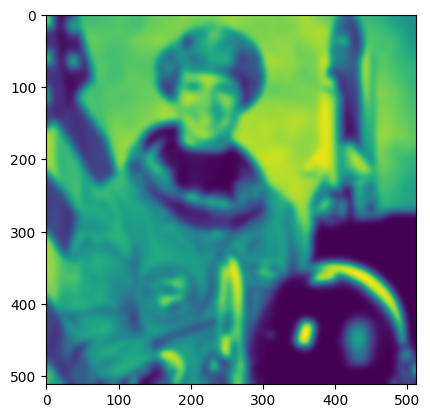

In [54]:
img5 = scipy.ndimage.gaussian_filter(img, 5)
plt.imshow(img5)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [60]:
img3 = scipy.ndimage.uniform_filter(img, 5)
img1 = meanfilter(img, 5)
assert numpy.allclose(img3, img1, atol=1/255)

AssertionError: 

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: